## NeuralProphetのサンプルコード

In [1]:
%load_ext lab_black

In [2]:
# ライブラリーのインポート
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

%matplotlib inline

# NeuralProphet
from neuralprophet import NeuralProphet

# 評価指標
from sklearn.metrics import mean_absolute_error

import warnings

warnings.filterwarnings("ignore")

In [3]:
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df = pd.read_csv("../../data/AirPassengers.csv")

# float型に変換
df["#Passengers"] = df["#Passengers"].astype("float64")
df = df.rename(columns={"#Passengers": "Passengers"})

# datetime型に変換にする
df.Month = pd.to_datetime(df.Month)

# データの中身を確認
df.head()

,Month,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


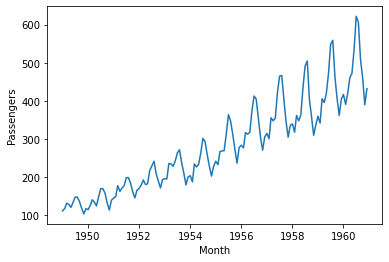

In [4]:
fig, ax = plt.subplots()
a = sns.lineplot(x="Month", y="Passengers", data=df)
plt.show()

In [5]:
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df = df[["ds", "y"]]

# 学習データとテストデータの分割
test_length = 12
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

In [6]:
params = {
    "growth": "linear",
    "changepoints": None,
    "n_changepoints": 10,
    "changepoints_range": 0.9,
    "trend_reg": 0,
    "trend_reg_threshold": False,
    "yearly_seasonality": True,
    "weekly_seasonality": False,
    "daily_seasonality": False,
    "seasonality_mode": "multiplicative",
    "seasonality_reg": 0,
    "n_forecasts": 1,
    "n_lags": 0,
    "num_hidden_layers": 0,
    "d_hidden": None,
    "ar_sparsity": None,
    "learning_rate": None,
    "epochs": 1000,
    "batch_size": None,
    "loss_func": "Huber",
    "train_speed": None,
    "normalize": "auto",
    "impute_missing": True,
}

In [7]:
%%time
model = NeuralProphet(**params)
model.fit(df_train, freq='M')

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:20<00:00, 12.43it/s, SmoothL1Loss=0.000226, MAE=6.25, RegLoss=0]


CPU times: user 1min 15s, sys: 4.02 s, total: 1min 19s
Wall time: 1min 21s


,SmoothL1Loss,MAE,RegLoss
0,0.910178,526.015481,0.0
1,0.533770,381.450492,0.0
2,0.246941,248.321113,0.0
3,0.105324,153.047573,0.0
4,0.067018,113.423865,0.0
...,...,...,...
995,0.000226,6.254542,0.0
996,0.000226,6.253464,0.0
997,0.000226,6.252742,0.0
998,0.000226,6.252677,0.0


In [8]:
# NeuralProphet 予測モデルの精度検証用データの生成
future = model.make_future_dataframe(
    df_train, periods=test_length, n_historic_predictions=len(df_train)
)
pred = model.predict(future)

#### 可視化

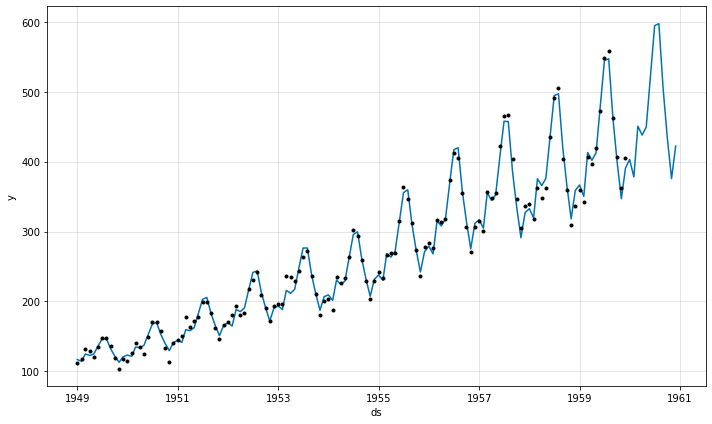

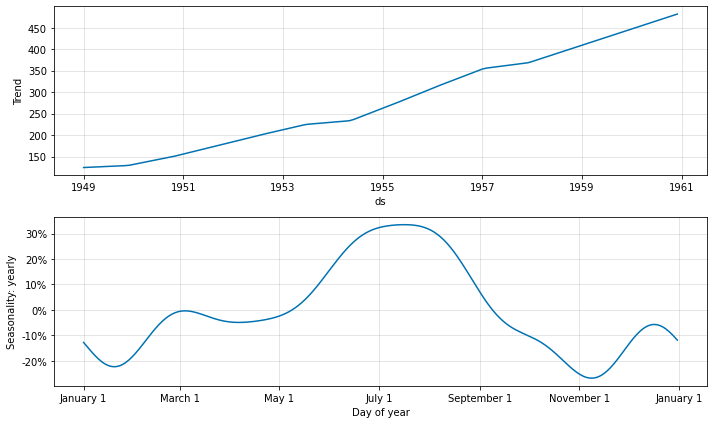

In [9]:
# NeuralProphet 予測モデルの予測結果（学習データ期間＋テストデータ期間）
pred_plot = model.plot(pred)  # 予想値（点は学習データの実測値）
component_plot = model.plot_components(pred)  # モデルの要素分解

#### 評価指標

In [10]:
# テストデータに予測値を結合
df_test["NeuralProphet Predict"] = pred.iloc[-test_length:].loc[:, "yhat1"]

In [11]:
# NeuralProphet 予測モデルの精度検証（テストデータ期間）
print("MAE(NeuralProphet):")
print(mean_absolute_error(df_test["y"], df_test["NeuralProphet Predict"]))

MAE(NeuralProphet):
17.17016855875651
